In [1]:
#import the required packages for linear and polynomial regression
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import glob

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
from pandas.tseries.offsets import *
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'./Alabama.csv', index_col=None, header=0)

In [5]:
ds = df[['Last_Update','Confirmed']]

In [34]:
ds

,Last_Update,Confirmed
0,2020-05-02,7294
1,2020-05-03,7611
2,2020-05-04,7888
3,2020-05-05,8112
4,2020-05-06,8437
5,2020-05-07,8691
6,2020-05-08,9046
7,2020-05-09,9385
8,2020-05-10,9668
9,2020-05-11,9889


In [6]:
ds['Last_Update'] = pd.to_datetime(ds['Last_Update']).dt.date

<ipython-input-6-9c781c4fb7f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['Last_Update'] = pd.to_datetime(ds['Last_Update']).dt.date


In [8]:
pd.TimeSeries = pd.Series
ts_data = pd.TimeSeries(ds.Confirmed.values, index=pd.to_datetime(ds.Last_Update))

In [13]:
ts_log_data = np.log(ts_data)

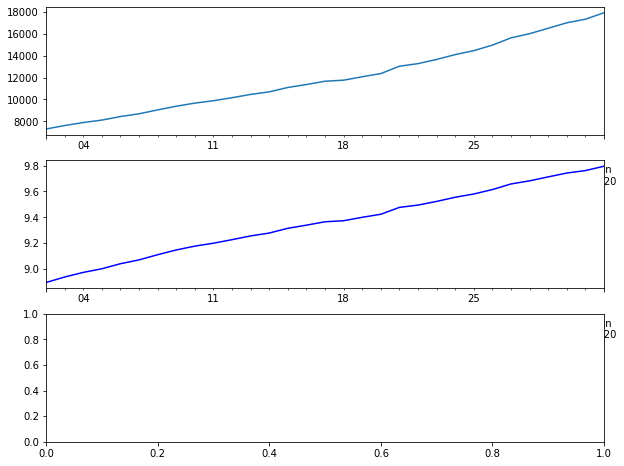

In [14]:
fig, axes = plt.subplots(figsize=(10,8), nrows=3)
ts_data.plot(ax=axes[0])
ts_log_data.plot(ax=axes[1], style='b-', label='actual')


In [56]:
model = sm.tsa.ARMA(ts_log_data, order=(3,0)).fit()
print(model.params)


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const      15.868843
ar.L1.y     0.996787
ar.L2.y     0.982778
ar.L3.y    -0.979587
dtype: float64


D:\Users\krato\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [57]:
start_date = ts_log_data.index[-1] + Day(1)
end_date = ts_log_data.index[-1] + Day(10)

In [58]:
y_forecast = model.predict(start_date.isoformat(), end_date.isoformat())

In [59]:
print(y_forecast)


2020-06-02     9.814174
2020-06-03     9.847156
2020-06-04     9.865522
2020-06-05     9.897909
2020-06-06     9.915932
2020-06-07     9.947735
2020-06-08     9.965423
2020-06-09     9.996654
2020-06-10    10.014015
2020-06-11    10.044686
Freq: D, dtype: float64


In [60]:
print(np.exp(y_forecast))

2020-06-02    18291.172109
2020-06-03    18904.516085
2020-06-04    19254.928891
2020-06-05    19888.737310
2020-06-06    20250.449099
2020-06-07    20904.822096
2020-06-08    21277.880938
2020-06-09    21952.898374
2020-06-10    22337.342233
2020-06-11    23033.063814
Freq: D, dtype: float64
